<h1><center><b> Road to Data Scientist and Data Analyst </center><h1/>
<h3><center> "Deep Learning with Tensorflow - Classification" </center><h3/>
<h3><center> "Copyright 2020 by Boyd BigData RPG - May Chongko Channel"  </center><h3/>

# Deep Learning with Classification

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in c:\users\chaiwat\anaconda3\envs\tfpt\lib\site-packages (4.0.1)


In [2]:
# Import TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the [Datasets](https://www.tensorflow.org/datasets) API:

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [4]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [5]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [6]:
train_dataset, test_dataset = dataset['train'], dataset['test']

Loading the dataset returns metadata as well as a *training dataset* and *test dataset*.

* The model is trained using `train_dataset`.
* The model is tested against `test_dataset`.

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [7]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Explore the data

- Check จำนวนของ Train กับ Test

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Check รูปฝั่ง Training Data

In [9]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [10]:
class_names[2]

'Pullover'

Image shape: (28, 28, 1)
Image Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Label shape: ()
Label Type: <class 'tensorflow.python.framework.ops.EagerTensor'>


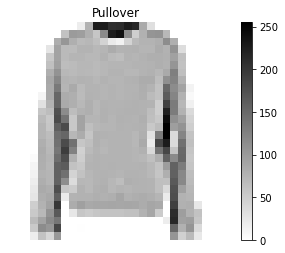

In [11]:
for img, label in train_dataset:
    print(f"Image shape: {img.shape}")
    print(f"Image Type: {type(img)}")
    print(f"Label shape: {label.shape}")
    print(f"Label Type: {type(label)}")
    plt.figure()
    plt.title(class_names[label])
    plt.imshow(img.numpy().reshape((28,28)), cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.axis('off')
    plt.show()
    break

## Check รูปฝั่ง Testing Data

In [12]:
label, type(label)

(<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 tensorflow.python.framework.ops.EagerTensor)

In [13]:
print(label)

tf.Tensor(2, shape=(), dtype=int64)


Image shape: (28, 28, 1)
Image Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Label shape: ()
Label Type: <class 'tensorflow.python.framework.ops.EagerTensor'>


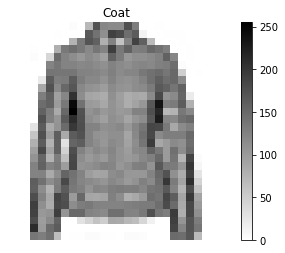

In [14]:
for img, label in test_dataset:
    print(f"Image shape: {img.shape}")
    print(f"Image Type: {type(img)}")
    print(f"Label shape: {label.shape}")
    print(f"Label Type: {type(label)}")
    plt.figure()
    plt.title(class_names[label])
    plt.imshow(img.numpy().reshape((28,28)), cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.axis('off')
    plt.show()
    break

## Preprocess the data
- ทำการ Normalization

In [15]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [16]:
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [1]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(30)):
    image = image.numpy().reshape((28,28))
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(class_names[label])
plt.show()

NameError: name 'plt' is not defined

## Create Model

The basic building block of a neural network is the *layer*. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted ("learned") during training.

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

NameError: name 'tf' is not defined

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

NameError: name 'model' is not defined

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [20]:
import numpy as np
BATCH_SIZE = 256
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

NameError: name 'train_dataset' is not defined

In [5]:
num_train_examples/BATCH_SIZE

NameError: name 'num_train_examples' is not defined

In [6]:
math.ceil(num_train_examples/BATCH_SIZE) # ปัดเลขขึ้น

NameError: name 'math' is not defined

In [7]:
model.fit(train_dataset, 
          epochs=5, 
          steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
          verbose=1)

NameError: name 'model' is not defined

ตอนนี้เรา Train แบบไม่เช็ค Validation Accuracy ได้ 89 %

In [8]:
model.summary()

NameError: name 'model' is not defined

## Check Test Evaluate accuracy


In [9]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

NameError: name 'model' is not defined

## ลอง Explore ตัว Testing Data

In [10]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

NameError: name 'test_dataset' is not defined

In [11]:
predictions.shape # 1 Batch = 32 ภาพ มี 10 คำตอบต่อ 1 ภาพ

NameError: name 'predictions' is not defined

In [12]:
predictions[0] # เช็ค Confidence คำตอบทั้ง 10 ตัว

NameError: name 'predictions' is not defined

In [13]:
np.argmax(predictions[0]) # คำตอบคือตัวลำดับที่ Confidence มากที่สุด

NameError: name 'np' is not defined

In [14]:
test_labels[0] # คำตอบของภาพแรก !! ถูกต้องเลย 

NameError: name 'test_labels' is not defined

We can graph this to look at the full set of 10 class predictions

In [15]:
class_names

NameError: name 'class_names' is not defined

In [16]:
img[...,0] == img.reshape((28,28)) # เขียนได้ทั้ง 2 แบบ (28,28,1)

NameError: name 'img' is not defined

In [21]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    # ปรับสีในคำตอบใต้ภาพ ถ้าถูกเป็นน้ำเงิน ผิดเป็นแดง
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predict: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    confidence_plot = plt.bar(range(10), predictions_array, color="#2C5364")
    plt.ylim([0, 1]) 

    predicted_label = np.argmax(predictions_array)

    # ปรับสีในคำตอบใต้ bargraph ถ้าถูกเป็นน้ำเงิน ผิดเป็นแดง
    confidence_plot[predicted_label].set_color('#b21f1f')
    confidence_plot[true_label].set_color('#396afc')

In [ ]:
test_images[0].shape, test_images[0][...,0].shape # เขียนเพื่อลบ Dim สุดท้ายออก

In [17]:
i = 0 # เช็คคำตอบตัวแรก
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

NameError: name 'plt' is not defined

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols # Plot กี่ภาพดี

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    # Plot ภาพชุด
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)

    # Plot Confidence ในการตอบ
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## ลองเช็คตัวที่ผิดดู

In [18]:
# Grab an image from the test dataset
img = test_images[3]

print(img.shape)

NameError: name 'test_images' is not defined

In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img]) 

print(img.shape)

Now predict the image:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [19]:
np.argmax(predictions_single)

NameError: name 'np' is not defined

In [ ]:
test_labels[3]

In [ ]:
plot_value_array(0, predictions_single, [test_labels[3]])
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
print(f"Predict: {np.argmax(predictions_single[0])}", 
      f"True: {test_labels[3]}")